In [18]:
####################################
##### Abalone Data Preparation #####
####################################

# read dataset
abalone.data <- read.csv("abalone_dataset.csv")

## add new column age.group with 3 values based on the number of rings 
abalone.data$age.group <- cut(abalone.data$rings, br=c(0,8,11,35), labels = c("young", 'adult', 'old'))

## alternative way of setting age.group
abalone.data$age.group[abalone.data$rings<=8] <- "young"
abalone.data$age.group[abalone.data$rings>8 & abalone.data$rings<=11] <- "adult"
abalone.data$age.group[abalone.data$rings>11 & abalone.data$rings<=35] <- "old"
abalone.data


sex,length,diameter,height,whole_weight,shucked_wieght,viscera_wieght,shell_weight,rings,age.group
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<fct>
M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,young
F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,adult
M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,adult
I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,young
I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,young
F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20,old
F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16,old
M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9,adult
F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19,old


### Part 1: Train and evaluate 2 kNN models using abalone dataset

• Each model should use a different subset of features

• Compare models using contingency tables

Find the optimal value k for the better performing model by training over
a range of k values and choosing the value with the highest accuracy
(accuracy = correct classifications / total observations)

#### Model 1: predict age with length, diameter, and height

In [20]:
library(class) 

#to predict- age-group
age.group <- abalone.data$age.group
#region

# 3-variables
length <- abalone.data$length 
diameter <- abalone.data$diameter
height <- abalone.data$height

summary(length)
summary(diameter)
summary(height)

na.idx <- is.na(age.group) | is.na(length) | is.na(diameter) | is.na(height)
abalone.knn.df1 <- data.frame(age.group = age.group[!na.idx],
                      length = length[!na.idx],
                      diameter = diameter[!na.idx],
                      height = height[!na.idx])
abalone.knn.df1

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.075   0.450   0.545   0.524   0.615   0.815 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0550  0.3500  0.4250  0.4079  0.4800  0.6500 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.1150  0.1400  0.1395  0.1650  1.1300 

age.group,length,diameter,height
<fct>,<dbl>,<dbl>,<dbl>
young,0.350,0.265,0.090
adult,0.530,0.420,0.135
adult,0.440,0.365,0.125
young,0.330,0.255,0.080
young,0.425,0.300,0.095
old,0.530,0.415,0.150
old,0.545,0.425,0.125
adult,0.475,0.370,0.125
old,0.550,0.440,0.150


In [36]:
# use full dataset - 80/20 split 
s.train1 <- sample(nrow(abalone.knn.df1), floor(0.8 * nrow(abalone.knn.df1)))

# create training and testing sets 
abalone.train1 <- abalone.knn.df1[s.train1, ]
abalone.test1  <- abalone.knn.df1[-s.train1, ]

dim(abalone.train1)
#abalone.train1

dim(abalone.test1)
#abalone.test1

[1] 3340    4

[1] 836   4

In [66]:
# Try different K Values

## kNN Model K=65  (~sqrt of samples)
# Choose k values to test
k.values <- c(65, 60, 55, 70, 75, 80)


for (k in k.values) {
    knn.predicted <- knn(abalone.train1[,2:4], abalone.test1[,2:4], abalone.train1[,1], k=k) #2-4 is predictors cols 
    ## confusion matrix/contingency table
    cm1 <- table(knn.predicted, abalone.test1[,1], dnn=list('predicted','actual'))
    accuracy <- sum(diag(cm1)) / sum(cm1)

    #printing
    cat("\n--- k =", k, "---\n")
    print(cm1)
    cat("Accuracy =", accuracy, "\n")
    
}


--- k = 65 ---
         actual
predicted young adult old
    young   204    74  21
    adult    68   275 130
    old       4    18  42
Accuracy = 0.6232057 

--- k = 60 ---
         actual
predicted young adult old
    young   204    72  21
    adult    68   273 136
    old       4    22  36
Accuracy = 0.6136364 

--- k = 55 ---
         actual
predicted young adult old
    young   205    71  21
    adult    66   274 136
    old       5    22  36
Accuracy = 0.6160287 

--- k = 70 ---
         actual
predicted young adult old
    young   205    74  23
    adult    67   274 132
    old       4    19  38
Accuracy = 0.6184211 

--- k = 75 ---
         actual
predicted young adult old
    young   206    76  24
    adult    67   270 133
    old       3    21  36
Accuracy = 0.6124402 

--- k = 80 ---
         actual
predicted young adult old
    young   205    73  24
    adult    68   274 135
    old       3    20  34
Accuracy = 0.6136364 


#### Model 2: predict age with shucked_wieght, viscera_wieght, shell_weight

In [68]:
# 3-variables: shucked_wieght	viscera_wieght	shell_weight	
shucked_wieght <- abalone.data$shucked_wieght 
viscera_wieght <- abalone.data$viscera_wieght
shell_weight <- abalone.data$shell_weight

summary(shucked_wieght)
summary(viscera_wieght)
summary(shell_weight)

na.idx <- is.na(age.group) | is.na(shucked_wieght) | is.na(viscera_wieght) | is.na(shell_weight)
abalone.knn.df2 <- data.frame(age.group = age.group[!na.idx],
                      shucked_wieght = shucked_wieght[!na.idx],
                      viscera_wieght = viscera_wieght[!na.idx],
                      shell_weight = shell_weight[!na.idx])
abalone.knn.df2

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0010  0.1860  0.3360  0.3594  0.5020  1.4880 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00050 0.09337 0.17100 0.18061 0.25300 0.76000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0015  0.1300  0.2340  0.2389  0.3290  1.0050 

age.group,shucked_wieght,viscera_wieght,shell_weight
<fct>,<dbl>,<dbl>,<dbl>
young,0.0995,0.0485,0.070
adult,0.2565,0.1415,0.210
adult,0.2155,0.1140,0.155
young,0.0895,0.0395,0.055
young,0.1410,0.0775,0.120
old,0.2370,0.1415,0.330
old,0.2940,0.1495,0.260
adult,0.2165,0.1125,0.165
old,0.3145,0.1510,0.320


In [70]:
# use full dataset - 80/20 split
s.train2 <- sample(nrow(abalone.knn.df2), floor(0.8 * nrow(abalone.knn.df2)))

# create training and testing sets 
abalone.train2 <- abalone.knn.df2[s.train2, ]
abalone.test2 <- abalone.knn.df2[-s.train2, ]

dim(abalone.train2)
# abalone.train2

dim(abalone.test2)
#abalone.test2

[1] 3340    4

[1] 836   4

In [72]:
# Try different K Values

## kNN Model K=65  (~sqrt of samples)
# Choose k values to test
k.values <- c(65, 60, 55, 70, 75, 80)


for (k in k.values) {
    knn.predicted <- knn(abalone.train2[,2:4], abalone.test2[,2:4], abalone.train2[,1], k=k) #2-4 is predictors cols 
    ## confusion matrix/contingency table
    cm2 <- table(knn.predicted, abalone.test2[,1], dnn=list('predicted','actual'))
    accuracy <- sum(diag(cm2)) / sum(cm2)

    #printing
    cat("\n--- k =", k, "---\n")
    print(cm2)
    cat("Accuracy =", accuracy, "\n")
    
}


--- k = 65 ---
         actual
predicted young adult old
    young   212    57  13
    adult    80   270 100
    old       5    25  74
Accuracy = 0.6650718 

--- k = 60 ---
         actual
predicted young adult old
    young   213    60  12
    adult    80   268 100
    old       4    24  75
Accuracy = 0.6650718 

--- k = 55 ---
         actual
predicted young adult old
    young   213    59  13
    adult    80   269  94
    old       4    24  80
Accuracy = 0.6722488 

--- k = 70 ---
         actual
predicted young adult old
    young   212    59  14
    adult    81   267  99
    old       4    26  74
Accuracy = 0.6614833 

--- k = 75 ---
         actual
predicted young adult old
    young   213    62  13
    adult    80   265  98
    old       4    25  76
Accuracy = 0.6626794 

--- k = 80 ---
         actual
predicted young adult old
    young   214    62  13
    adult    79   264 100
    old       4    26  74
Accuracy = 0.6602871 


### Part 2: Train K-Means and PAM models for the abalone dataset 
-- Use the best performing feature subset from the previous exercise-- I will use model 2: shucked_wieght, viscera_wieght, shell_weight

-- Find the optimal value K for each model and plot a silhouette plot
of the model with that K value.

#### K-means

In [91]:
library(ggplot2)
library(cluster)

features <- c("shucked_wieght", "viscera_wieght", "shell_weight")
df_features <- abalone.data[, features]
df_features

shucked_wieght,viscera_wieght,shell_weight
<dbl>,<dbl>,<dbl>
0.0995,0.0485,0.070
0.2565,0.1415,0.210
0.2155,0.1140,0.155
0.0895,0.0395,0.055
0.1410,0.0775,0.120
0.2370,0.1415,0.330
0.2940,0.1495,0.260
0.2165,0.1125,0.165
0.3145,0.1510,0.320


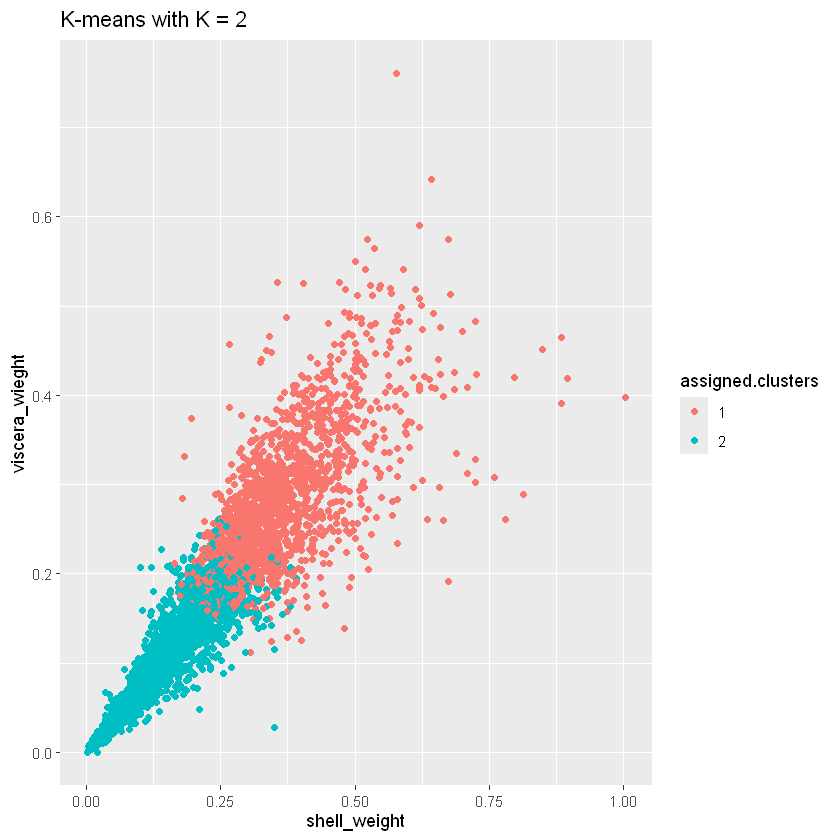

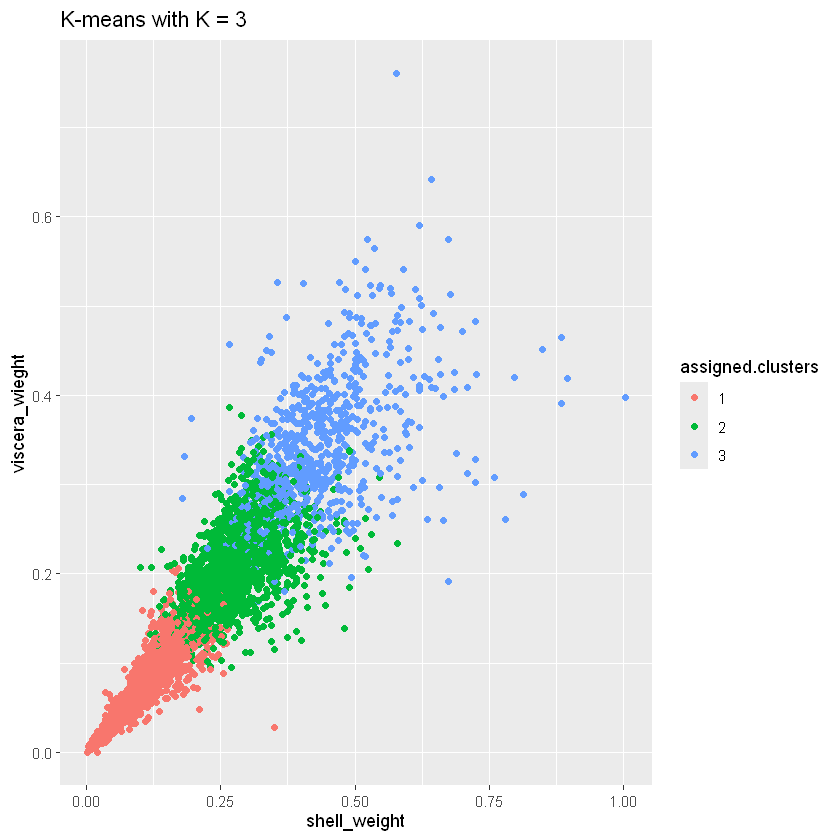

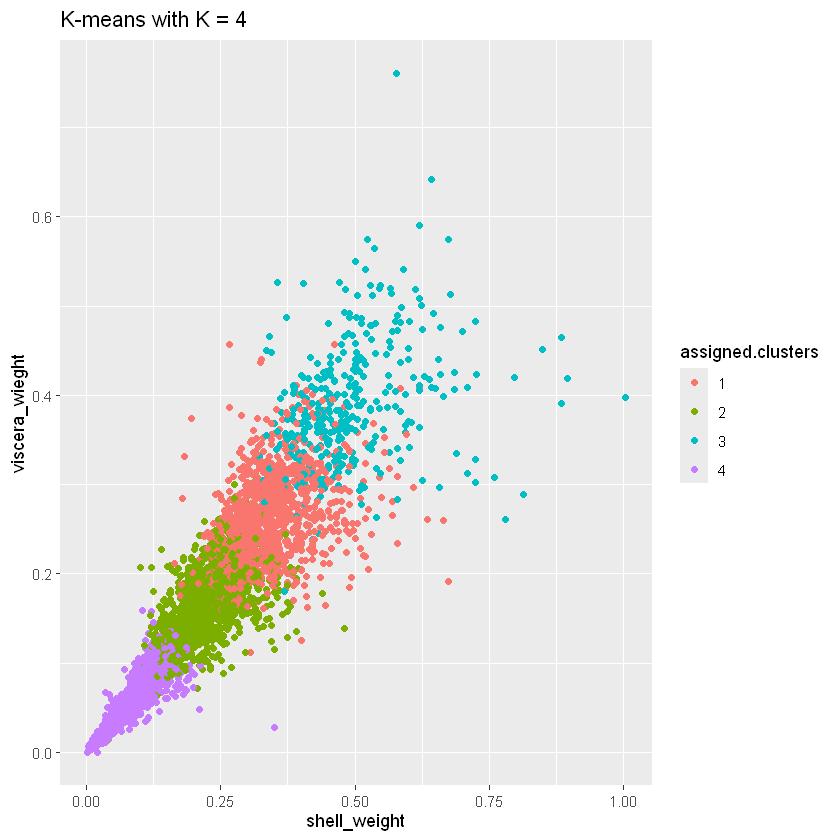

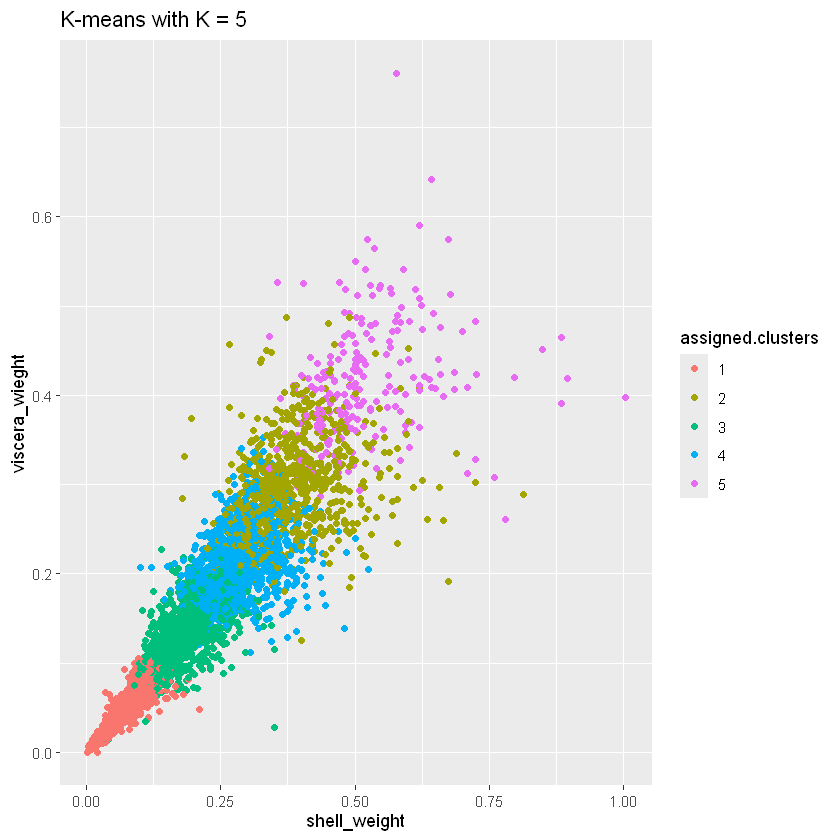

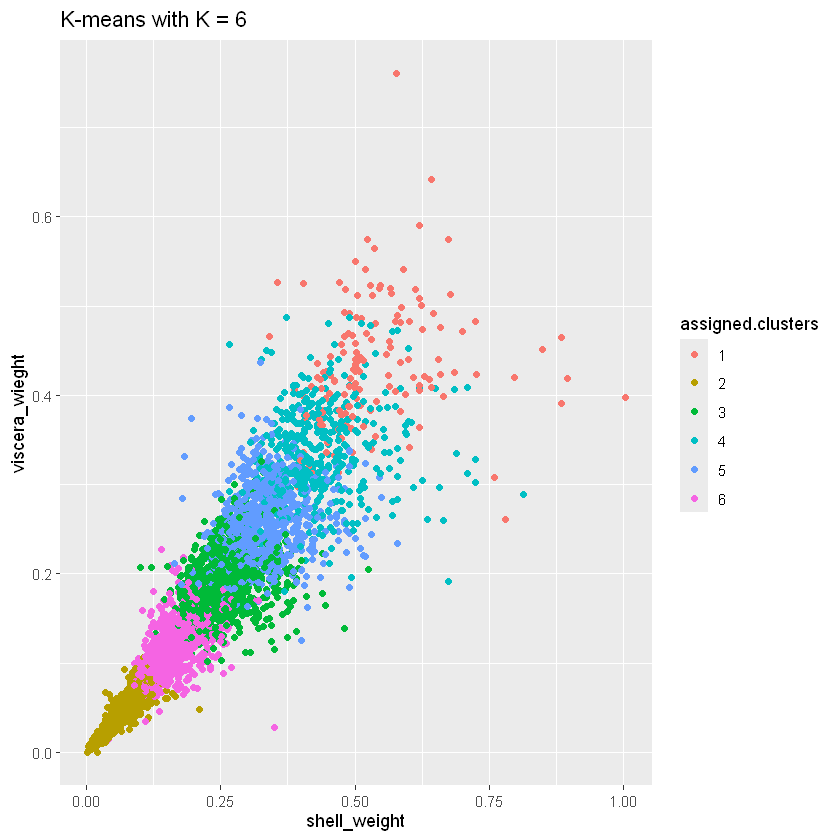

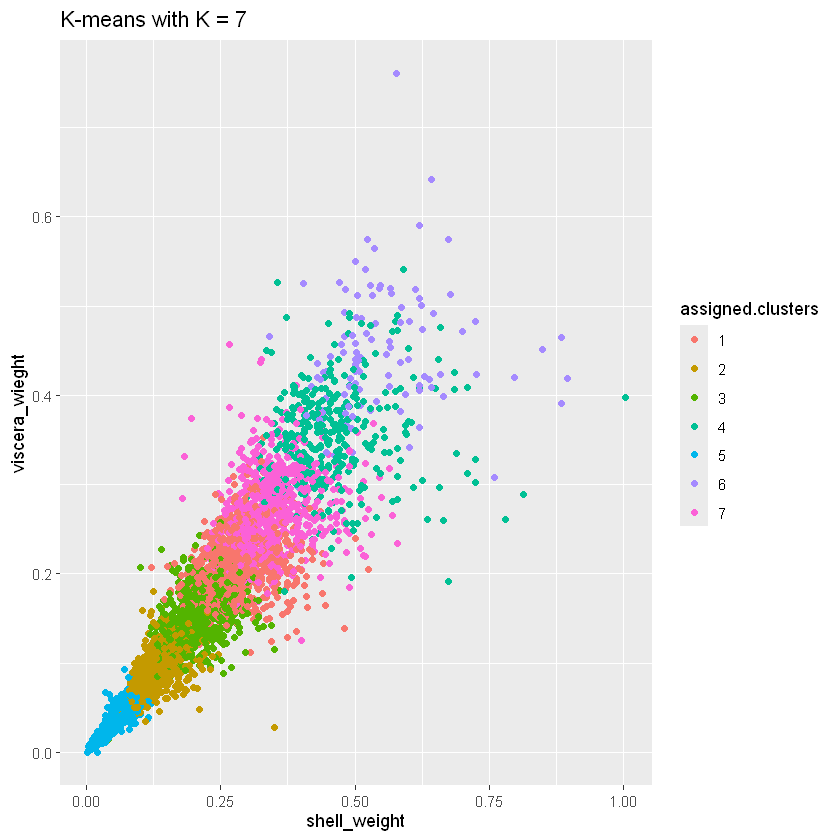

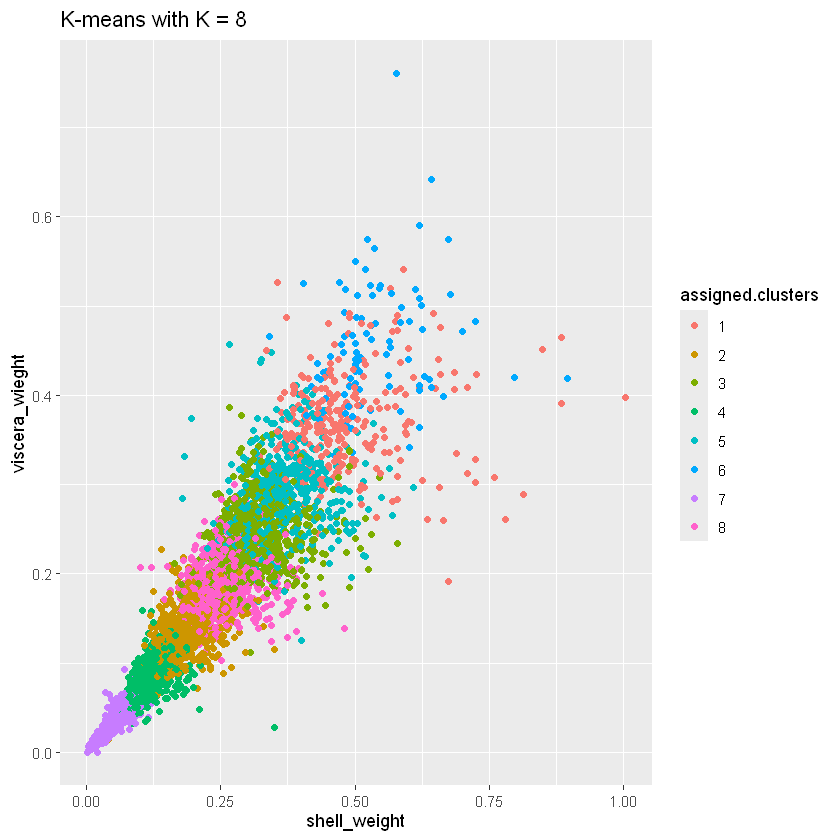

[1] 123.35950  72.10379  49.86841  38.53350  32.37267  28.43665  25.79657

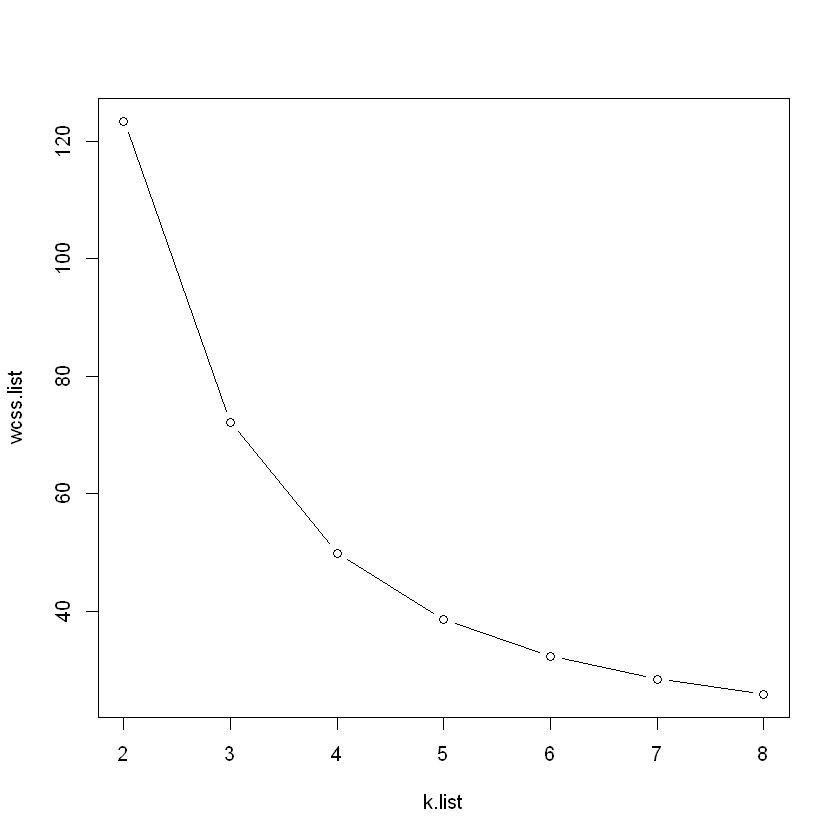

In [128]:
### K-Means ###

#trying multiple k values
k.list <- c(2, 3, 4, 5, 6, 7, 8)
wcss.list <- c()

for (k in k.list) {
    
    abalone.km <- kmeans(df_features, centers = k)
    #abalone.km
    
    ## Within clusters sum of squares
    wcss <- abalone.km$tot.withinss
    wcss.list <- c(wcss.list,wcss)

    
    ## get and plot clustering output 
    assigned.clusters <- as.factor(abalone.km$cluster)

    print(
        ggplot(data = data.frame(df_features, cluster = assigned.clusters), aes(x = shell_weight, y = viscera_wieght, colour = assigned.clusters)) +
        geom_point() + labs(title = paste("K-means with K =", k))
    )
}

plot(k.list,wcss.list,type = "b")
wcss.list

#### this elbow plot shows where adding k doesnt make much of a difference anymore- elbow could be 3 or 4

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

Warning message:
"`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.
ℹ The deprecated feature was likely used in the factoextra package.
  Please report the issue at <https://github.com/kassambara/factoextra/issues>."


  cluster size ave.sil.width
1       1 1691          0.44
2       2 1669          0.59
3       3  816          0.35


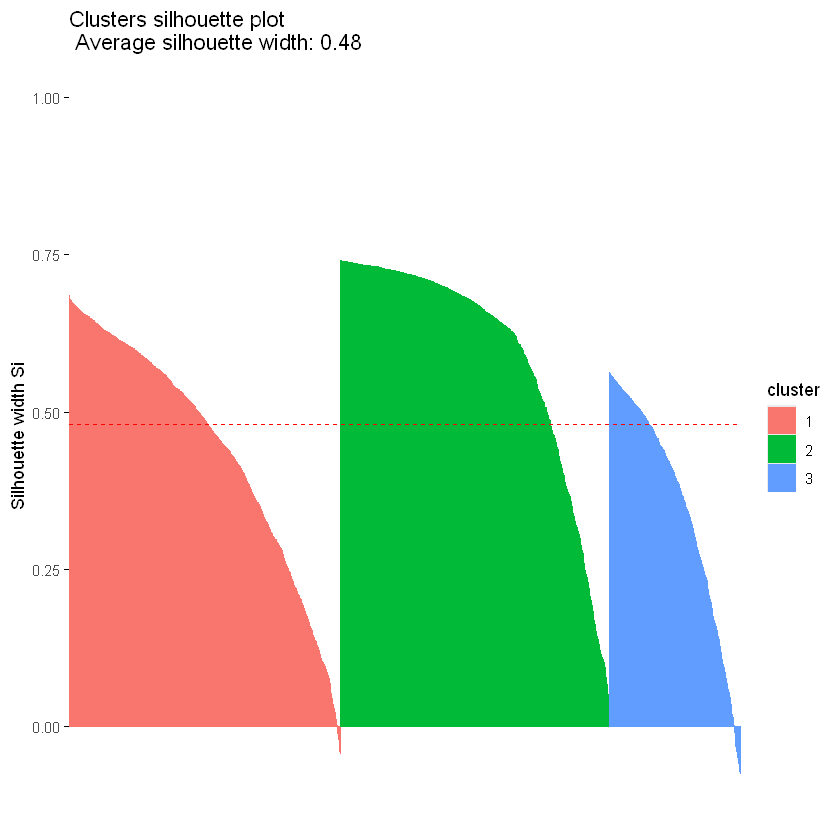

In [121]:
## Silhouette Plot of best k --- 3 or 4 
library(factoextra)

abalone.km3 <- kmeans(df_features, centers = 3)

sil <- silhouette(abalone.km3$cluster, dist(df_features))
fviz_silhouette(sil)

#### PAM Model

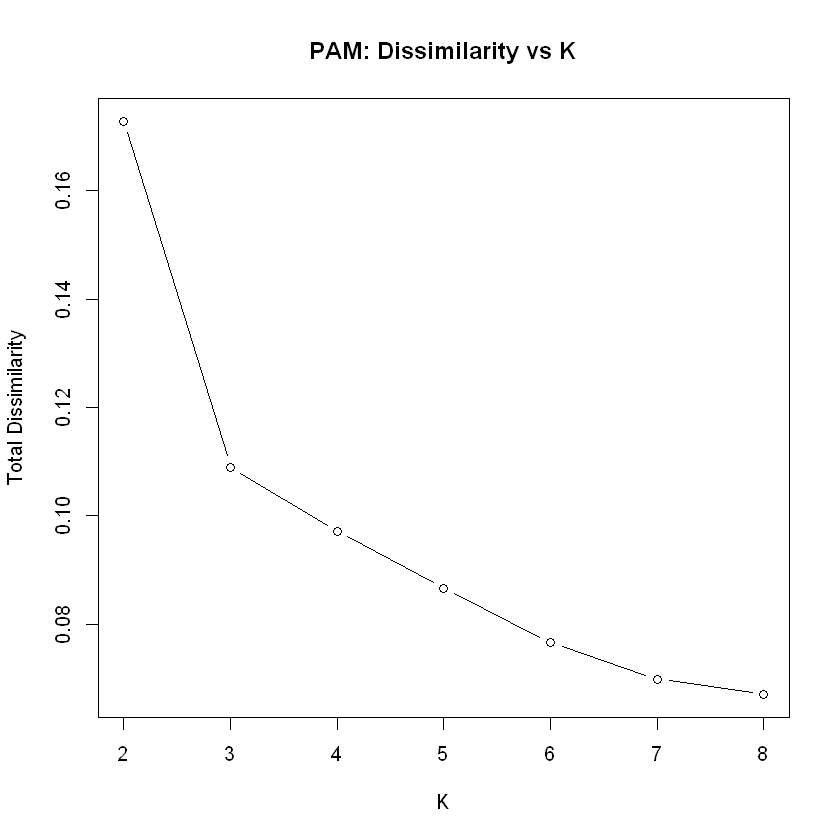

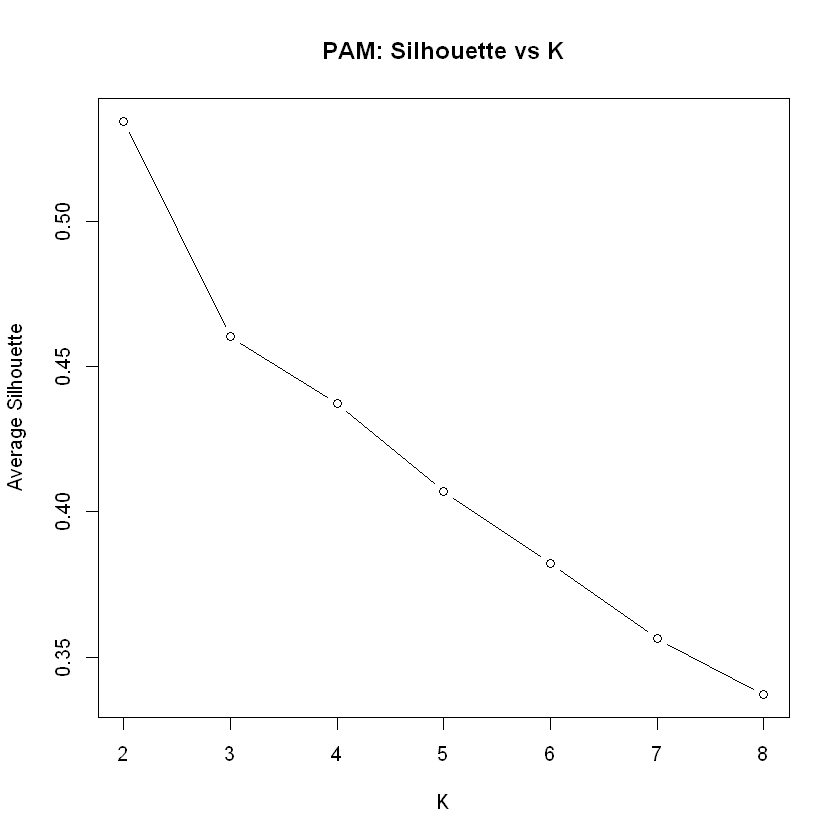

In [139]:
### Partitioning Around Medoids ###

k.list <- c(2, 3, 4, 5, 6, 7, 8)
sumdiss.list <- c()
si.list <- c()

for (k in k.list) {
    
    abalone.pam <- pam(df_features, k)

    # Total dissimilarity
    sumdiss <- abalone.pam$objective[1]
    sumdiss.list <- c(sumdiss.list,sumdiss)
  
    if (k>1){
        si <- silhouette(abalone.pam$cluster, dist(df_features))
        avg.si <- mean(si[, 3])  
        si.list <- c(si.list,avg.si)
    }
}
   

plot(k.list,sumdiss.list,type = "b", xlab = "K", ylab = "Total Dissimilarity",
     main = "PAM: Dissimilarity vs K")
plot(k.list,si.list,type = "b", xlab = "K", ylab = "Average Silhouette",
     main = "PAM: Silhouette vs K")

  cluster size ave.sil.width
1       1 2151          0.63
2       2 2025          0.43


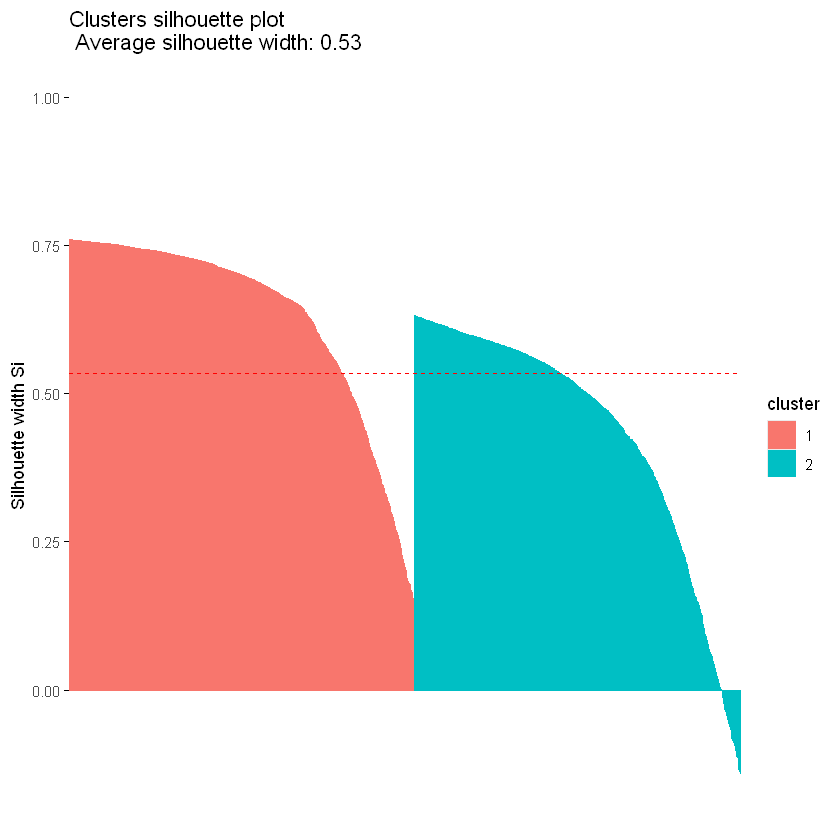

In [143]:
## Silhouette Plot- Best k = K value with the highest average silhouette score (more compact, well-separated clusters) = 2

abalone.pam <- pam(df_features, 2)

sil <- silhouette(abalone.pam$cluster, dist(df_features))
fviz_silhouette(sil)